# 初始尝试（作废）

In [9]:
import pandas as pd
import numpy as np

path = 'me/data/'
df = pd.read_csv(path + 'train.csv', nrows=200000)

In [10]:
df

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0


In [7]:
sample_df = pd.read_csv(path + 'train_sample.csv')

In [8]:
sample_df

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,07/11/2017 09:30,NaN,0
1,105560,25,1,17,259,07/11/2017 13:40,NaN,0
2,101424,12,1,19,212,07/11/2017 18:05,NaN,0
3,94584,13,1,13,477,07/11/2017 04:58,NaN,0
4,68413,12,1,1,178,09/11/2017 09:00,NaN,0
5,93663,3,1,17,115,09/11/2017 01:22,NaN,0
6,17059,1,1,17,135,09/11/2017 01:17,NaN,0
7,121505,9,1,25,442,07/11/2017 10:01,NaN,0
8,192967,2,2,22,364,08/11/2017 09:35,NaN,0
9,143636,3,1,19,135,08/11/2017 12:35,NaN,0


# Pearson系数

In [1]:
# encoding:utf-8

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import time

In [17]:
path = 'me/data/'
df = pd.read_csv(path + 'test.csv')

start_time = time.time()

print("---------------源feature---------------")
print(df.head())
print()
print("---------------源feature相关性---------------")
df.corr().to_csv(path + 'corr/corr_basic.csv')
# print(df.corr())
print()

basic_list = ['ip', 'app', 'device', 'os', 'channel']
basic_df = df[basic_list]
basic_array = basic_df.as_matrix()

poly = PolynomialFeatures(2, interaction_only=True)
extended_array = poly.fit_transform(basic_array)

new_feature_name = []
# 编号为1，2，3，4，5
# 则组合顺序为：1., 1,2,3,4,5, 12,13,14,15, 23,24,25, 34,35, 45
# 索引：从6-15
for i in range(len(basic_list)):
    for j in range(i + 1, len(basic_list)):
        new_feature_name.append(basic_list[i] + '_' + basic_list[j])

new_data = []
for i in range(6, 16):
    new_data.append(extended_array[:, i])

for i in range(10):
    df[new_feature_name[i]] = new_data[i]

print("---------------组合basic feature---------------")
print(df.head())
print()
print("---------------新feature相关性---------------")
df.corr().to_csv(path + 'corr/corr_extended.csv')
# print(df.corr())

df['hour'] = pd.to_datetime(df.click_time).dt.hour.astype('uint8')
# df['day'] = pd.to_datetime(df.click_time).dt.day.astype('uint8')
# df['wday'] = pd.to_datetime(df.click_time).dt.dayofweek.astype('uint8')

print("---------------添加temporal feature---------------")
print(df.head())
print()
print("---------------新feature相关性---------------")
correlations = df.corr()
correlations.to_csv(path + 'corr/corr_temporal.csv')
# print(correlations)

print()
# print("---------------保存extended_df---------------")
# df.to_csv(path + 'test_extended')
print("--------------------")
print("Time: " + str(time.time() - start_time) + "s")

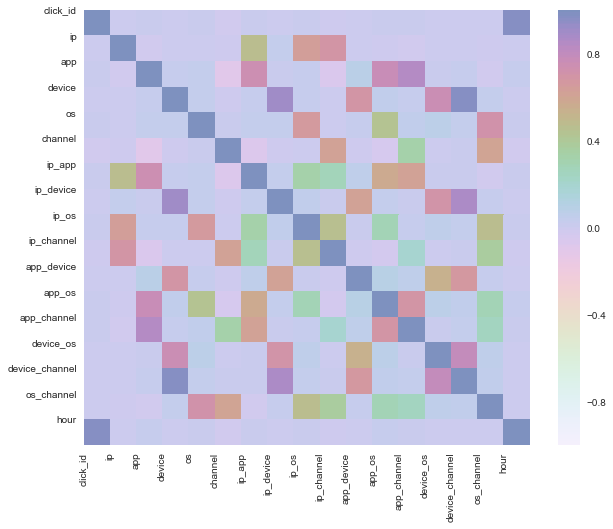

In [72]:
import seaborn as sns

names = correlations.index.tolist()
f, ax = plt.subplots(figsize = (10, 8))

# method 1
# cax = ax.matshow(correlations, vmin=-1, vmax=1)  # 绘制热力图，从-1到1
# fig.colorbar(cax)  # 将matshow生成热力图设置为颜色渐变条

# method 2
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.3, as_cmap = True)
sns.heatmap(correlations, vmax=1, vmin=-1, cmap=cmap)

ticks = np.arange(0, len(names), 1)  # 生成0-9，步长为1
ax.set_xticks(ticks)  # 生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')  # 生成x轴标签
ax.set_yticklabels(names)

plt.savefig(path + 'corr/corr_all.png')
plt.show()

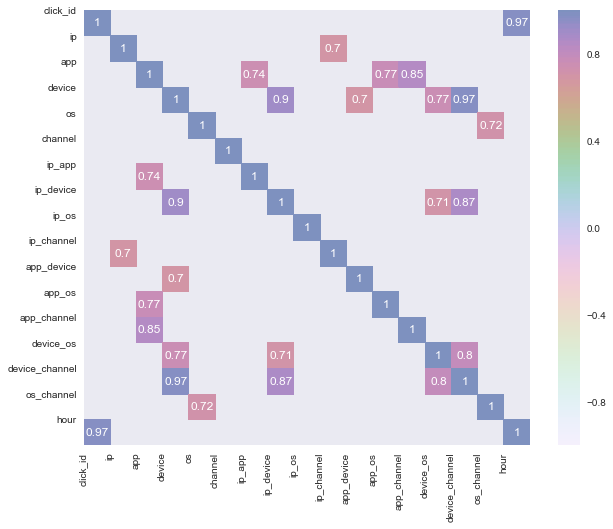

In [76]:
import seaborn as sns

names = correlations.index.tolist()
f, ax = plt.subplots(figsize = (10, 8))

# method 1
# cax = ax.matshow(correlations, vmin=-1, vmax=1)  # 绘制热力图，从-1到1
# fig.colorbar(cax)  # 将matshow生成热力图设置为颜色渐变条

# method 2
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.3, as_cmap = True)
sns.heatmap(correlations, vmax=1, vmin=-1, 
            cmap=cmap, mask=correlations<0.7, annot=True)

ticks = np.arange(0, len(names), 1)  # 生成0-9，步长为1
ax.set_xticks(ticks)  # 生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')  # 生成x轴标签
ax.set_yticklabels(names)

plt.savefig(path + 'corr/corr_mask0.7.png')
plt.show()

# 互信息

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import time

path = 'me/data/'
df = pd.read_csv(path + 'test.csv')

start_time = time.time()

basic_list = ['ip', 'app', 'device', 'os', 'channel']
basic_df = df[basic_list]
basic_array = basic_df.as_matrix()

poly = PolynomialFeatures(2, interaction_only=True)
extended_array = poly.fit_transform(basic_array)

new_feature_name = []
# 编号为1，2，3，4，5
# 则组合顺序为：1., 1,2,3,4,5, 12,13,14,15, 23,24,25, 34,35, 45
# 索引：从6-15
for i in range(len(basic_list)):
    for j in range(i + 1, len(basic_list)):
        new_feature_name.append(basic_list[i] + '_' + basic_list[j])

new_data = []
for i in range(6, 16):
    new_data.append(extended_array[:, i])

for i in range(10):
    df[new_feature_name[i]] = new_data[i]

df['hour'] = pd.to_datetime(df.click_time).dt.hour.astype('uint8')

print()
# print("---------------保存extended_df---------------")
# df.to_csv(path + 'test_extended')
print("--------------------")
print("Time: " + str(time.time() - start_time) + "s")


--------------------
Time: 25.37750005722046s


In [4]:
names = df.columns.values.tolist()
names.remove('click_id')
names.remove('click_time')
feaures_sum = len(names)

In [16]:
import sklearn.metrics as mr

start_time = time.time()
correlations = np.zeros((feaures_sum, feaures_sum))
for i in range(feaures_sum):
    print("i = " + str(i))
    for j in range(i):
        correlations[i, j] = mr.mutual_info_score(df[names[i]], df[names[j]])
        print("\tcorr[%d,%d] = %f" % (i, j, correlations[i, j]))
        print("\tj = " + str(j) + ", Time: " + str(time.time() - start_time) + "s")

# correlations_df.to_csv(path + 'corr/mi/corr_extended.csv')
print("Time: " + str(time.time() - start_time) + "s")

In [29]:
info_df = pd.DataFrame(index=names)
for i in range(len(names)):
    info_df[names[i]] = correlations[:,i]
info_df.to_csv(path+'corr/mi/mutual_info.csv')

# 计算条件熵

In [1]:
# todo：计算条件熵，归一化公式为 I(X;Y) / ( H(X) + H(Y) - I(X;Y) )
import pandas as pd
import numpy as np
import time
import gc
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('me/data/test.csv')

start_time = time.time()

basic_list = ['ip', 'app', 'device', 'os', 'channel']
basic_df = df[basic_list]
basic_array = basic_df.as_matrix()

poly = PolynomialFeatures(2, interaction_only=True)
extended_array = poly.fit_transform(basic_array)

features_name = basic_list.copy()
new_feature_name = []
# 编号为1，2，3，4，5
# 则组合顺序为：1., 1,2,3,4,5, 12,13,14,15, 23,24,25, 34,35, 45
# 索引：从6-15
for i in range(len(basic_list)):
    for j in range(i + 1, len(basic_list)):
        new_feature_name.append(basic_list[i] + '_' + basic_list[j])
        features_name.append(basic_list[i] + '_' + basic_list[j])

new_data = []
for i in range(6, 16):
    new_data.append(extended_array[:, i])

for i in range(10):
    df[new_feature_name[i]] = new_data[i]

df['hour'] = pd.to_datetime(df.click_time).dt.hour.astype('uint8')
features_name.append('hour')
features_sum = len(features_name)

print()
print("--------------------")
print("Time: " + str(time.time() - start_time) + "s")


--------------------
Time: 32.30470395088196s


In [2]:
path = 'doc/corr/'
mi_df = pd.read_csv(path+'mi/mutual_info.csv',index_col=0)
mi_array = mi_df.as_matrix()
correlations = np.zeros(mi_array.shape)

In [3]:
def calc_ent(x):
    """
        calculate shanno ent of x
    """
    start_time = time.time()
    x_value_list = set([x[i] for i in range(x.shape[0])])
    ent = 0.0
    for x_value in x_value_list:
        p = float(x[x == x_value].shape[0]) / x.shape[0]
        logp = np.log2(p)
        ent -= p * logp
    print("\tTime of calc_ent:" + str(time.time() - start_time) + "s")
    return ent

In [2]:
# start_time = time.time()
# for i in range(features_sum):
#     print("i = " + str(i))
#     for j in range(i):
# #         h_x = calc_ent(df[features_name[i]].as_matrix())
# #         h_y = calc_ent(df[features_name[j]].as_matrix())
# #         correlations[i, j] = mi_array[i, j] / (h_x + h_y - mi_array[i, j])
# #         print("\tcorr[%d,%d] = %f" % (i, j, correlations[i, j]))
# #         print("\tj = " + str(j) + ", Time: " + str(time.time() - start_time) + "s")
# #         
# # correlations_df = pd.DataFrame(index=features_name)
# # for i in range(features_sum):
# #     correlations_df[features_name[i]] = correlations[:,i]
# # correlations_df.to_csv(path+'corr/mi/normalized_mi.csv')

# 条件熵分析作图

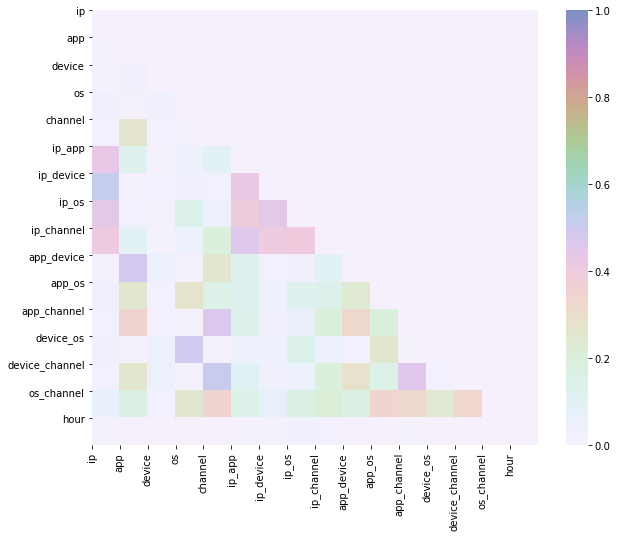


ip & app: 0.00927286991461
ip & device: 0.00694314823037
ip & os: 0.0295303991247
ip & channel: 0.01910882176
ip & app_device: 0.0116509685587
ip & app_os: 0.0352817805537
ip & app_channel: 0.0269119027086
ip & device_os: 0.0319996095279
ip & device_channel: 0.0232395465844
ip & os_channel: 0.0687097193232
ip & hour: 0.00842828568901

app & device: 0.0278221472785
app & os: 0.0138230238585
app & channel: 0.269795263371
app & ip_device: 0.0147259939819
app & ip_os: 0.0259135610616
app & ip_channel: 0.104454990715
app & device_os: 0.0146956128532
app & device_channel: 0.263802502515
app & os_channel: 0.174031886398
app & hour: 0.00196613604054

device & os: 0.0292843937519
device & channel: 0.0190570407725
device & ip_app: 0.010875061967
device & ip_os: 0.0123530449439
device & ip_channel: 0.0109356373285
device & app_os: 0.0164432432512
device & app_channel: 0.0215004570006
device & os_channel: 0.0157067148459
device & hour: 0.00218613697383

os & channel: 0.0111228058317
os & ip_app: 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlations = pd.read_csv('doc/corr/mi/normalized_mi.csv', index_col=0)

names = correlations.index.tolist()
f, ax = plt.subplots(figsize=(10, 8))

mask_value = 0
cmap = sns.cubehelix_palette(start=1.5, rot=3, gamma=0.3, as_cmap=True)

if mask_value != 0:
    sns.heatmap(correlations, vmax=1, vmin=0, cmap=cmap,
                annot=True, mask=correlations < mask_value)
else:
    sns.heatmap(correlations, vmax=1, vmin=0, cmap=cmap, annot=False)

ticks = np.arange(0, len(names), 1)  # 生成0-9，步长为1
ax.set_xticks(ticks)  # 生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')  # 生成x轴标签
ax.set_yticklabels(names)

plt.savefig('doc/corr/mi/corr_mask' + str(mask_value) + '.png')
plt.show()

for i in names:
    print()
    for j in names:
        corr = correlations[i][j]
        if corr > mask_value:
            flag = True
            i_str = i.split('_')
            for i_s in i_str:
                if i_s in j:
                    flag = False
            if flag is True:
                print(i + " & " + j + ": " + str(corr))